In [1]:
import numpy as np
import pandas as pd
import pods
import matplotlib.pyplot as plt
import mlai
import teaching_plots as plot 
from IPython.display import HTML

In [16]:
%matplotlib inline
fig = plt.figure(frameon=False)
fig.set_size_inches(2,3)

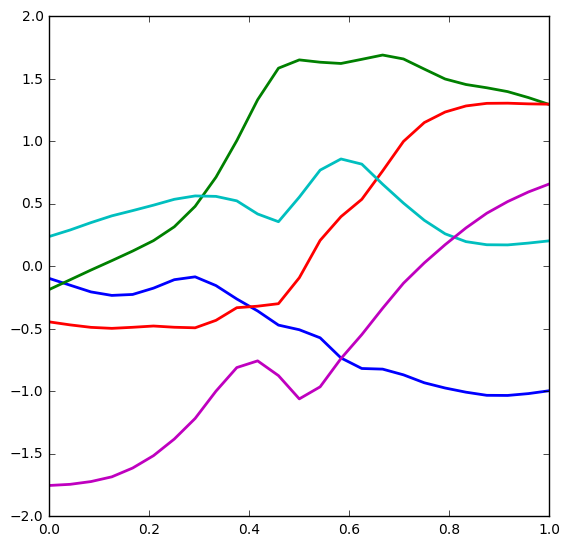

In [2]:
%matplotlib inline
x = np.linspace(-1, 1, 100)[:, None]
x_cov = np.linspace(-1, 1, 25)[:, None]
plot.covariance_func(x, kernel_function=mlai.compute_kernel, x_cov=x_cov, 
                     formula = r"""$${k}\left({{{\bf {x}}}},{{{\bf {x}}}}^{\prime}\right)=\alpha \text{asin}\left(\frac{w{{{\bf {x}}}}^\top {{{\bf {x}}}}^\prime + b}{\sqrt{w{{{\bf {x}}}}^\top{{{\bf {x}}}}+ b + 1}\sqrt{w{{{{\bf {x}}}}^\prime}^\top{{{\bf {x}}}}^\prime + b + 1}}\right)$$""",
                     shortname='mlp', 
                     longname='Multilayer Perceptron', kernel=mlai.mlp_cov,
                     comment='Based on an infinite neural network model',
                     w=40., b=4.)

In [3]:
HTML(open('./diagrams/mlp_covariance.html', 'r').read())

,


### Covariance Functions

**MLP Covariance Function**

$${k}\left({{{\bf {x}}}},{{{\bf {x}}}}^{\prime}\right)=\alpha \text{asin}\left(\frac{w{{{\bf {x}}}}^\top {{{\bf {x}}}}^\prime + b}{\sqrt{w{{{\bf {x}}}}^\top{{{\bf {x}}}}+ b + 1}\sqrt{w{{{{\bf {x}}}}^\prime}^\top{{{\bf {x}}}}^\prime + b + 1}}\right)$$


-   Based on infinite neural network model.

$$w = 40$$ $$b = 4$$

mlpcovarianceSample

linearcovarianceInit


### Covariance Functions

**Linear Covariance Function**

$${k}\left({{{\bf {x}}}},{{{\bf {x}}}}^{\prime}\right)=\alpha {{{\bf {x}}}}^\top {{{\bf {x}}}}^\prime$$


-   Bayesian linear regression.

$$\alpha = 1$$

In [4]:
HTML(open('./diagrams/linear_covariance.html', 'r').read())

,


lincovarianceSample


### Gaussian Noise

-   Gaussian noise model,
    $$p\left({y}_{i}|{f}_{i}\right) = {\mathcal{N}\left({y}_{i}|{f}_{i},{\sigma}^2\right)}$$
    where ${\sigma}^2$ is the variance of the noise.

-   Equivalent to a covariance function of the form
    $${k}({{{\bf {x}}}}_i, {{{\bf {x}}}}_j) = \delta_{i, j}{\sigma}^2$$
    where $\delta_{i,j}$ is the Kronecker delta function.

-   Additive nature of Gaussians means we can simply add this term to
    existing covariance matrices.

markovcovarianceInit


### Covariance Functions

#### Where did this covariance matrix come from?

**Markov Process**

$${k}\left(t,t^{\prime}\right)=\alpha \text{min}(t, t^\prime)$$



-   Covariance matrix is built using the *inputs* to the function $t$.

markovcovarianceSample

In [5]:
HTML(open('./diagrams/brownian_covariance.html', 'r').read())

,


markovprecisionInit

### Covariance Functions

#### Where did this covariance matrix come from?

**Markov Process**

**Visualization of inverse covariance (precision).**


-   Precision matrix is sparse: only neighbours in matrix are non-zero.

-   This reflects *conditional* independencies in data.

-   In this case *Markov* structure.

markovprecisionPlot

rbfcovarianceInit


### Covariance Functions

#### Where did this covariance matrix come from?

**Exponentiated Quadratic Kernel Function (RBF, Squared Exponential,
Gaussian)**

$${k}\left({{{\bf {x}}}},{{{\bf {x}}}}^{\prime}\right)=\alpha\exp\left(-\frac{{\left\Vert {{{\bf {x}}}}-{{{\bf {x}}}}^{\prime} \right\Vert_2}^{2}}{2{\ell}^{2}}\right)$$


-   Covariance matrix is built using the *inputs* to the function
    ${{{\bf {x}}}}$.

-   For the example above it was based on Euclidean distance.

-   The covariance function is also know as a kernel.

rbfcovarianceSample

In [1]:
HTML(open('./diagrams/eq_covariance.html', 'r').read())

NameError: name 'HTML' is not defined

rbfprecisionInit

### Covariance Functions

#### Where did this covariance matrix come from?

**Exponentiated Quadratic**

**Visualization of inverse covariance (precision).**

-   Precision matrix is not sparse.

-   Each point is dependent on all the others.

-   In this case non-Markovian.

rbfprecisionSample

markovprecisionInit



### Covariance Functions

#### Where did this covariance matrix come from?

**Markov Process**

**Visualization of inverse covariance (precision).**

-   Precision matrix is sparse: only neighbours in matrix are non-zero.

-   This reflects *conditional* independencies in data.

-   In this case *Markov* structure.

markovprecisionPlot

### Simple Kalman Filter

-   We have state vector
    ${\mathbf{X}}= \left[{\mathbf{{x}}}_1
          \dots {\mathbf{{x}}}_{q}\right] \in \mathbb{R}^{{T}\times {q}}$
    and if each state evolves independently we have 
		
        \begin{align}
        p({\mathbf{X}}) &= \prod_{i=1}^{q} p({\mathbf{{x}}}_{:,
			i}) \\
				p({\mathbf{{x}}}_{:, i})&= {\mathcal{N}\left({\mathbf{{x}}}_{:,
					i}|{\mathbf{0}},{\mathbf{K}}\right)}.
						\end{align}

-   We want to obtain outputs through:
    $${\mathbf{{y}}}_{i, :} = {\mathbf{W}}{\mathbf{{x}}}_{i, :}$$

### Stacking and Kronecker Products

-   Represent with a ‘stacked’ system:
    $$p({\mathbf{{x}}}) = {\mathcal{N}\left({\mathbf{{x}}}|{\mathbf{0}},{\mathbf{I}}\otimes {\mathbf{K}}\right)}$$
    where the stacking is placing each column of
    ${\mathbf{X}}$ one on top of another as
    $${\mathbf{{x}}}= \begin{bmatrix}
          {\mathbf{{x}}}_{:, 1}\\
          {\mathbf{{x}}}_{:, 2}\\
          \vdots\\
          {\mathbf{{x}}}_{:, {q}}
        \end{bmatrix}$$

In [ ]:
plot.kronecker_illustrate()

### Kronecker Product

<img src='./diagrams/kronecker_product.svg'>

In [ ]:

plot.kronecker_IK()

### Kronecker Product

<img src='./diagrams/kronecker_IK.svg'>

### Stacking and Kronecker Products

-   Represent with a ‘stacked’ system:
    $$p({\mathbf{{x}}}) = {\mathcal{N}\left({\mathbf{{x}}}|{\mathbf{0}},{\mathbf{I}}\otimes {\mathbf{K}}\right)}$$
    where the stacking is placing each column of
    ${\mathbf{X}}$ one on top of another as
    $${\mathbf{{x}}}= \begin{bmatrix}
          {\mathbf{{x}}}_{:, 1}\\
          {\mathbf{{x}}}_{:, 2}\\
          \vdots\\
          {\mathbf{{x}}}_{:, {q}}
        \end{bmatrix}$$

### Column Stacking

gpKalmanFilterKroneckerPlot2

<span>For this stacking the marginal distribution over *time* is given
by the block diagonals.</span>

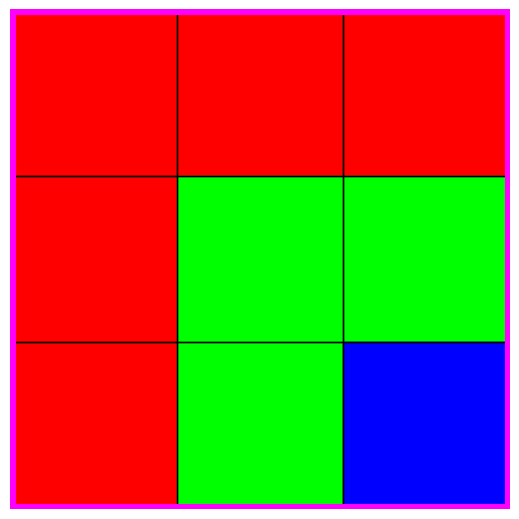

In [7]:
plot.kronecker_IK_highlight()

In [9]:
pods.notebook.display_plots('kronecker_IK_highlighted{count:0>3}.svg', './diagrams', count=(1,5))

### Two Ways of Stacking

Can also stack each row of ${\mathbf{X}}$ to form
column vector: $${\mathbf{{x}}}= \begin{bmatrix}
      {\mathbf{{x}}}_{1, :}\\
      {\mathbf{{x}}}_{2, :}\\
      \vdots\\
      {\mathbf{{x}}}_{{T}, :}
    \end{bmatrix}$$
$$p({\mathbf{{x}}}) = {\mathcal{N}\left({\mathbf{{x}}}|{\mathbf{0}},{\mathbf{K}}\otimes {\mathbf{I}}\right)}$$

### Row Stacking

gpKalmanFilterKroneckerPlot3

\
<span>For this stacking the marginal distribution over the latent
*dimensions* is given by the block diagonals.</span>

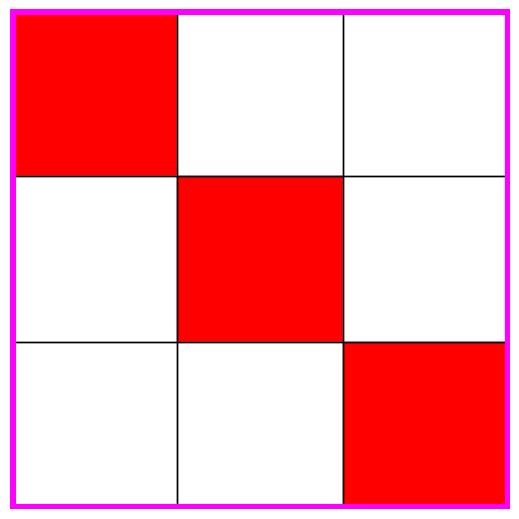

In [10]:
plot.kronecker_IK_highlight(reverse=True)

In [11]:
pods.notebook.display_plots('kronecker_KI_highlighted{count:0>3}.svg', './diagrams', count=(1,5))

ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

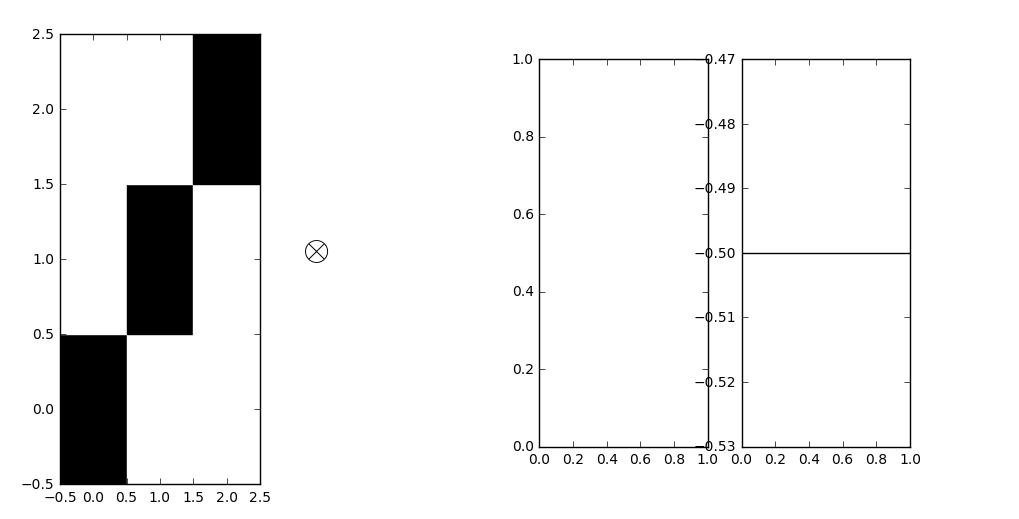

In [12]:

plot.kronecker_IK(reverse=True)

### Mapping from Latent Process to Observed


<img src='./diagrams/kronecker_KI.svg'>
gpKalmanFilterKroneckerPlot4

### Observed Process

The observations are related to the latent points by a linear mapping
matrix,
$${\mathbf{{y}}}_{i, :} = {\mathbf{W}}{\mathbf{{x}}}_{i, :} + {\boldsymbol{\epsilon}}_{i, :}$$
$${\boldsymbol{\epsilon}}\sim {\mathcal{N}\left(0,{\sigma}^2{\mathbf{I}}\right)}$$

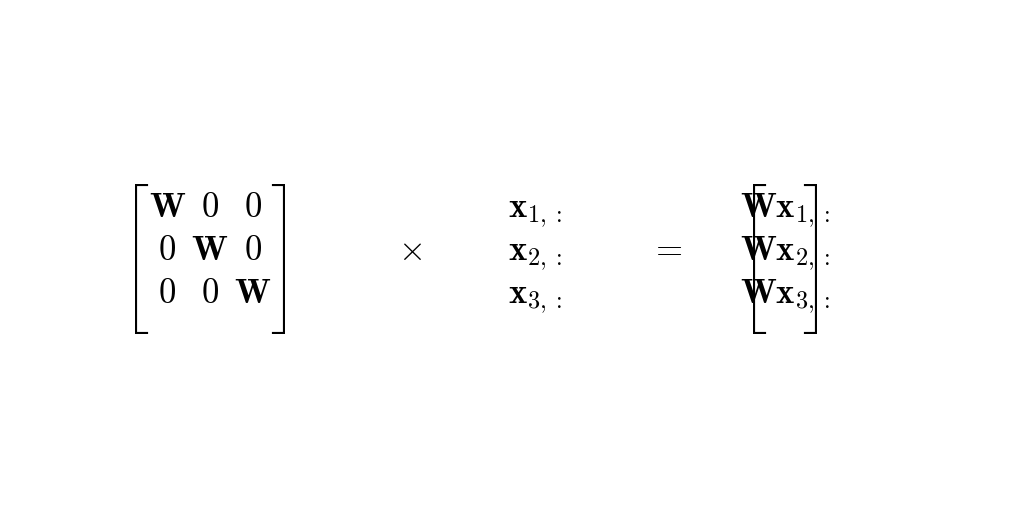

In [13]:
import pods
import mlai
import teaching_plots as plot 
plot.kronecker_WX()

<img src='./diagrams/kronecker_WX.svg'>

### Output Covariance

This leads to a covariance of the form
$$({\mathbf{I}}\otimes {\mathbf{W}}) ({\mathbf{K}}\otimes {\mathbf{I}}) ({\mathbf{I}}\otimes {\mathbf{W}}^\top) + {\mathbf{I}}{\sigma}^2$$
Using
$(\mathbf{A}\otimes\mathbf{B}) (\mathbf{C}\otimes\mathbf{D}) = \mathbf{A}\mathbf{C} \otimes \mathbf{B}\mathbf{D}$
This leads to
$${\mathbf{K}}\otimes {\mathbf{W}}{\mathbf{W}}^\top + {\mathbf{I}}{\sigma}^2$$
or
$${\mathbf{{y}}}\sim {\mathcal{N}\left(0,{\mathbf{W}}{\mathbf{W}}^\top \otimes {\mathbf{K}}+ {\mathbf{I}}{\sigma}^2\right)}$$

gpKalmanMultiTaskInit

### Kernels for Vector Valued Outputs: A Review

### Kronecker Structure GPs

-   This Kronecker structure leads to several published models.
    $$({\mathbf{K}}({{\bf {x}}},{{\bf {x}}}^\prime))_{{d},{d}^\prime}={k}({{\bf {x}}},{{\bf {x}}}^\prime){k}_T({d},{d}^\prime),$$
    where ${k}$ has ${{\bf {x}}}$ and ${k}_T$ has ${n}$ as inputs.

-   Can think of multiple output covariance functions as covariances
    with augmented input.

-   Alongside ${{\bf {x}}}$ we also input the ${d}$ associated with the
    *output* of interest.

### Separable Covariance Functions

-   Taking
    ${\mathbf{B}}= {\mathbf{W}}{\mathbf{W}}^\top$ we
    have a matrix expression across outputs.
    $${\mathbf{K}}({{\bf {x}}},{{\bf {x}}}^\prime)={k}({{\bf {x}}},{{\bf {x}}}^\prime){\mathbf{B}},$$
    where ${\mathbf{B}}$ is a ${p}\times {p}$
    symmetric and positive semi-definite matrix.

-   ${\mathbf{B}}$ is called the
    *coregionalization* matrix.

-   We call this class of covariance functions *separable* due to their
    product structure.

### Sum of Separable Covariance Functions

-   In the same spirit a more general class of kernels is given by
    $${\mathbf{K}}({{\bf {x}}},{{\bf {x}}}^\prime)=\sum_{{j}=1}^{q}{k}_{j}({{\bf {x}}},{{\bf {x}}}^\prime){\mathbf{B}}_{j}.$$

-   This can also be written as
    $${\mathbf{K}}({{\bf X}}, {{\bf X}}) = \sum_{{j}=1}^{q}{\mathbf{B}}_{j}\otimes {k}_{j}({{\bf X}}, {{\bf X}}),$$

-   This is like several Kalman filter-type models added together, but
    each one with a different set of latent functions.

-   We call this class of kernels sum of separable kernels
    (SoS kernels).

### Geostatistics

-   Use of GPs in Geostatistics is called kriging.

-   These multi-output GPs pioneered in geostatistics: prediction over
    vector-valued output data is known as *cokriging*.

-   The model in geostatistics is known as the *linear model of
    coregionalization* (LMC, <span>@Journel:miningBook78
    [@Goovaerts:book97]</span>).

-   Most machine learning multitask models can be placed in the context
    of the LMC model.

### Weighted sum of Latent Functions

-   In the linear model of coregionalization (LMC) outputs are expressed
    as linear combinations of independent random functions.

-   In the LMC, each component ${f}_{d}$ is expressed as a linear sum
    $${f}_{d}({{\bf {x}}}) = \sum_{{j}=1}^{q}{w}_{{d},{j}}{u}_{{j}}({{\bf {x}}}).$$
    where the latent functions are independent and have covariance
    functions ${k}_{{j}}({{\bf {x}}},{{\bf {x}}}^\prime)$.

-   The processes $\{{f}_{{j}}({{\bf {x}}})\}_{{j}=1}^{q}$ are
    independent for $q \neq {j}^\prime$.

### Kalman Filter Special Case

-   The Kalman filter is an example of the LMC where
    ${u}_i({{\bf {x}}}) \rightarrow {x}_i(t)$.

-   I.e. we’ve moved form time input to a more general input space.

-   In matrix notation:

    1.  Kalman filter
        $${\mathbf{F}}= {\mathbf{W}}{{\bf X}}$$

    2.  LMC
        $${\mathbf{F}}= {\mathbf{W}}{\mathbf{U}}$$

    where the rows of these matrices ${\mathbf{F}}$,
    ${{\bf X}}$, ${\mathbf{U}}$ each
    contain ${q}$ samples from their corresponding functions at a
    different time (Kalman filter) or spatial location (LMC).

### Intrinsic Coregionalization Model

-   If one covariance used for latent functions (like in Kalman filter).

-   This is called the intrinsic coregionalization model (ICM,
    <span>@Goovaerts:book97</span>).

-   The kernel matrix corresponding to a dataset
    ${{\bf X}}$ takes the form
    $${\mathbf{K}}({{\bf X}}, {{\bf X}}) =  {\mathbf{B}}\otimes {k}({{\bf X}}, {{\bf X}}).$$

### Autokrigeability

-   If outputs are noise-free, maximum likelihood is equivalent to
    independent fits of ${\mathbf{B}}$ and
    ${k}({{\bf {x}}}, {{\bf {x}}}^\prime)$
    <span>[@Helterbrand:universalCR94]</span>.

-   In geostatistics this is known as autokrigeability
    <span>[@Wackernagel:multivariate03]</span>.

-   In multitask learning its the cancellation of intertask transfer
    <span>[@Bonilla:multi07]</span>.

### Intrinsic Coregionalization Model

$${\mathbf{K}}({{\bf X}}, {{\bf X}}) =  {\mathbf{{w}}}{\mathbf{{w}}}^\top  \otimes {k}({{\bf X}}, {{\bf X}}).$$

 $${\mathbf{{w}}}= \begin{bmatrix} 1 \\ 5\end{bmatrix}$$
$${\mathbf{B}}= \begin{bmatrix} 1 & 5\\ 5&25\end{bmatrix}$$

gpKalmanToMultiTaskIcm

![image](../../../multigp/tex/diagrams/icmCovarianceImage)![image](../../../multigp/tex/diagrams/icmCovarianceSample1)![image](../../../multigp/tex/diagrams/icmCovarianceSample2)![image](../../../multigp/tex/diagrams/icmCovarianceSample3)![image](../../../multigp/tex/diagrams/icmCovarianceSample4)

### Intrinsic Coregionalization Model

$${\mathbf{K}}({{\bf X}}, {{\bf X}}) =  {\mathbf{B}}\otimes {k}({{\bf X}}, {{\bf X}}).$$


$${\mathbf{B}}= \begin{bmatrix} 1 & 0.5\\ 0.5& 1.5\end{bmatrix}$$

gpKalmanToMultiTaskIcm2

<span>![image](../../../multigp/tex/diagrams/icm2CovarianceImage)</span><span>![image](../../../multigp/tex/diagrams/icm2CovarianceSample1)</span><span>![image](../../../multigp/tex/diagrams/icm2CovarianceSample2)</span><span>![image](../../../multigp/tex/diagrams/icm2CovarianceSample3)</span><span>![image](../../../multigp/tex/diagrams/icm2CovarianceSample4)</span>

### LMC Samples

$${\mathbf{K}}({{\bf X}}, {{\bf X}}) = {\mathbf{B}}_1 \otimes {k}_1({{\bf X}}, {{\bf X}}) + {\mathbf{B}}_2 \otimes {k}_2({{\bf X}}, {{\bf X}})$$


$${\mathbf{B}}_1 = \begin{bmatrix} 1.4 & 0.5\\ 0.5& 1.2\end{bmatrix}$$
$${\ell}_1 = 1$$
$${\mathbf{B}}_2 = \begin{bmatrix} 1 & 0.5\\ 0.5& 1.3\end{bmatrix}$$
$${\ell}_2 = 0.2$$

gpKalmanToMultiTaskLmc

![image](../../../multigp/tex/diagrams/lmc2CovarianceImage)![image](../../../multigp/tex/diagrams/lmc2CovarianceSample1)![image](../../../multigp/tex/diagrams/lmc2CovarianceSample2)![image](../../../multigp/tex/diagrams/lmc2CovarianceSample3)![image](../../../multigp/tex/diagrams/lmc2CovarianceSample4)

### LMC in Machine Learning and Statistics

-   Used in machine learning for GPs for multivariate regression and in
    statistics for computer emulation of expensive multivariate
    computer codes.

-   Imposes the correlation of the outputs explicitly through the set of
    coregionalization matrices.

-   Setting ${\mathbf{B}}={\mathbf{I}}_{p}$ assumes
    outputs are conditionally independent given the parameters
    ${\boldsymbol{{\theta}}}$.
    [@Minka:learningtolearn97; @Lawrence:learning04; @Kai:multitask05].

-   More recent approaches for multiple output modeling are different
    versions of the linear model of coregionalization.

### Semiparametric Latent Factor Model

-   Coregionalization matrices are rank 1
    <span>@Teh:semiparametric05</span>. rewrite equation as
    $${\mathbf{K}}({{\bf X}}, {{\bf X}}) = \sum_{{j}=1}^{q}{\mathbf{{w}}}_{:, {j}}{\mathbf{{w}}}^{\top}_{:, {j}} \otimes {k}_{j}({{\bf X}}, {{\bf X}}).$$

-   Like the Kalman filter, but each latent function has a
    *different* covariance.

-   Authors suggest using an exponentiated quadratic characteristic
    length-scale for each input dimension.

### Semiparametric Latent Factor Model Samples

$${\mathbf{K}}({{\bf X}}, {{\bf X}}) = {\mathbf{{w}}}_{:, 1}{\mathbf{{w}}}_{:, 1}^\top \otimes {k}_1({{\bf X}}, {{\bf X}}) + {\mathbf{{w}}}_{:, 2} {\mathbf{{w}}}_{:, 2}^\top \otimes {k}_2({{\bf X}}, {{\bf X}})$$

 $${\mathbf{{w}}}_1 = \begin{bmatrix} 0.5 \\ 1\end{bmatrix}$$
$${\mathbf{{w}}}_2 = \begin{bmatrix} 1 \\ 0.5\end{bmatrix}$$

gpKalmanToMultiTaskSlfm

![image](../../../multigp/tex/diagrams/slfmCovarianceImage)![image](../../../multigp/tex/diagrams/slfmCovarianceSample1)![image](../../../multigp/tex/diagrams/slfmCovarianceSample2)![image](../../../multigp/tex/diagrams/slfmCovarianceSample3)![image](../../../multigp/tex/diagrams/slfmCovarianceSample4)

### Gaussian processes for Multi-task, Multi-output and Multi-class

-   @Bonilla:multi07 suggest ICM for multitask learning.

-   Use a PPCA form for ${\mathbf{B}}$: similar to our
    Kalman filter example.

-   Refer to the autokrigeability effect as the cancellation of
    inter-task transfer.

-   Also discuss the similarities between the multi-task GP and the ICM,
    and its relationship to the SLFM and the LMC.

### Multitask Classification

-   Mostly restricted to the case where the outputs are conditionally
    independent given the hyperparameters $\boldsymbol{\phi}$
    <span>[@Minka:learningtolearn97; @Williams:multiclass98; @Lawrence:learning04; @Seeger:multiple04; @Kai:multitask05; @Rasmussen:book06]</span>.

-   Intrinsic coregionalization model has been used in the
    multiclass scenario. @Skolidis:multiclass11 use the intrinsic
    coregionalization model for classification, by introducing a probit
    noise model as the likelihood.

-   Posterior distribution is no longer analytically tractable:
    approximate inference is required.

### Computer Emulation

-   A statistical model used as a surrogate for a computationally
    expensive computer model.

-   @Higdon:high08 use the linear model of coregionalization to model
    images representing the evolution of the implosion of
    steel cylinders.

-   In @Conti:multi09 use the ICM to model a vegetation model: called
    the Sheffield Dynamic Global Vegetation Model
    <span>[@Woodward:vegetation98]</span>.

### References